
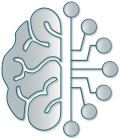

**Start at:** Monday 17 June 2024, 13:58:57  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [38]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)

import tools4pyPhysChem as t4pPC


# TCCM Homework:<br>**Data-Driven and ML Color Analysis of Portuguese Wines**

<div class="intro">
    
<p style="text-align: center"><img width="650px" src="./DS4B-CO2-images/vinho-verde-header.jpg" style="margin-left:auto; margin-right:auto" id="img_vinho_verde"></p>
<br>

1. The purpose of this project is to **predict the quality** of Portuguese Vinho Verde wines based on their **physicochemical components**. The intent is to **replace a panel of wine tasters with an artificial neural network**.

2. Two **datasets** (one for white wines and the other for red wines) are downloadable on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). The input variables (descriptors) are
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Whereas the output variable, ***i.e.* the target**, is a 0 to 10 quality score, based on sensory data

3. **Bibliography**. There are two main references:
- An [original paper](https://doi.org/10.1016/j.dss.2009.05.016): Modeling wine preferences by data mining from physicochemical properties (**2009**), by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, José Reis, *Decision Support Systems* **47**: 547-553
- A [Wine Project github repository](https://github.com/kmspitzer/final-wineproject), at the core of the [Wine Quality website](https://ucsd-winequality.herokuapp.com/). Authors explored several classifiers: K Nearest Neighbors, Decision Tree, Random Forest, Random Forest Regressor, Stochastic Gradient Descent, Support Vector Classification, Linear Support Vector Classification, AdaBoost Classifier, Gradient Boost Classifier, XGB Classifier, and obtained 69% to 95% performance, the highest being from the Random Forest Regression, Random Forest, and XGBoost models.

Some useful pieces of codes will be found on the previous website as well as on the present pyPhysChem repository. If you analyze the ML notebooks carefully, you will see that some pieces of code such as automatic one-hot encoding etc... are available, although they might have not been used during the talktorials (see the [DS4B-Appendix.ipynb notebook](./DS4B-Appendix.ipynb) and the [tools4PytChem.py scripts](./config/tools4PytChem.py))

4. **Mandatory implementation**.
- The code will be developed in Python, in **this Jupyter notebook**, using mainly the Keras and Tensorflow ML libraries, although some ML SciKit Learn tools can also be used, if necessary.
- It will be commented both using **Markdown cells** and **Python block comments or inline comments**.
- No separate report is required, the **final present notebook** will be used both to evaluate the code and to explain the purpose of each section and how the results should be analyzed.
- Particular attention will be paid to the **organization of the notebook**: use headers, ordered or unordered list of items, tables, mathematical formulas, hyperlinks, images, ....
- As done in the [Wine Project available in github](https://github.com/kmspitzer/final-wineproject), **data will be cleaned and prepared**. A correlation matrix will plotted. You will do that separately for white and red wines. It could be interesting - or not -  to build a database mixing red and white wines, with a 12th descriptor for the wine color.
- You will try either a **simple ANN** and a **deep learning approach**. In addition to the accuracy of each tested ANN architecture, a **confusion matrix** would be helpful to better assess their performance.
- The numerical stability of the best model will be assessed using a **5-fold cross validation**.
</div>


<div class="rqT" title="Which libraries or skills do you need?">

- management of datas with `pandas`: see basic applications in the [iris1 notebook](./DS4B-Iris1.ipynb)
- definition and training of an ANN model with `keras`, such as done with the ["CO<sub>2</sub> solubility in ILs" notebook](DS4B-CO2_solubility-ANN.ipynb)
- look at the possibility to do a logistic regression, as done with the [identification of Iris species in the iris3 notebook](./DS4B-Iris3.ipynb)
- `matplotlib` and `seaborn` could be useful as well, to produce nice graphical analysis
- the `rdkit` library is not needed, as the various wines seem to differ only by the concentration of chemical compounds, not their nature

## Importation of the libraries

In [39]:
# insert your code here
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
    
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os,sys
from IPython.display import display

sns.set_style("whitegrid")

## Reading of the database in pandas dataframes & data exploration

### Reading and basic statistics

In [3]:
def readWines(prt=True):
    from pathlib import Path
    
    pathway = Path() / "ML-data"
    dataRedWineFile=pathway / 'winequality-red.csv'
    dfRedWine=pd.read_csv(dataRedWineFile,sep=";",header=0)
    dfRedWine["color"] = "red" 
    if (prt): display(dfRedWine)
    # describe() generates descriptive statistics
    if (prt): display(dfRedWine.describe().style.format("{0:.2f}"))
    if (prt): print(dfRedWine.groupby('quality').size())
    
    dataWhiteWineFile=pathway / 'winequality-white.csv'
    dfWhiteWine=pd.read_csv(dataWhiteWineFile,sep=";",header=0)
    dfWhiteWine["color"] = "white" 
    if (prt): display(dfWhiteWine)
    # describe() generates descriptive statistics
    if (prt): display(dfWhiteWine.describe().style.format("{0:.2f}"))
    if (prt): print(dfWhiteWine.groupby('quality').size())
    return dfRedWine,dfWhiteWine

dfRedWine, dfWhiteWine = readWines()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


### Correlation between features?

column names = Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')
properties (features) = ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


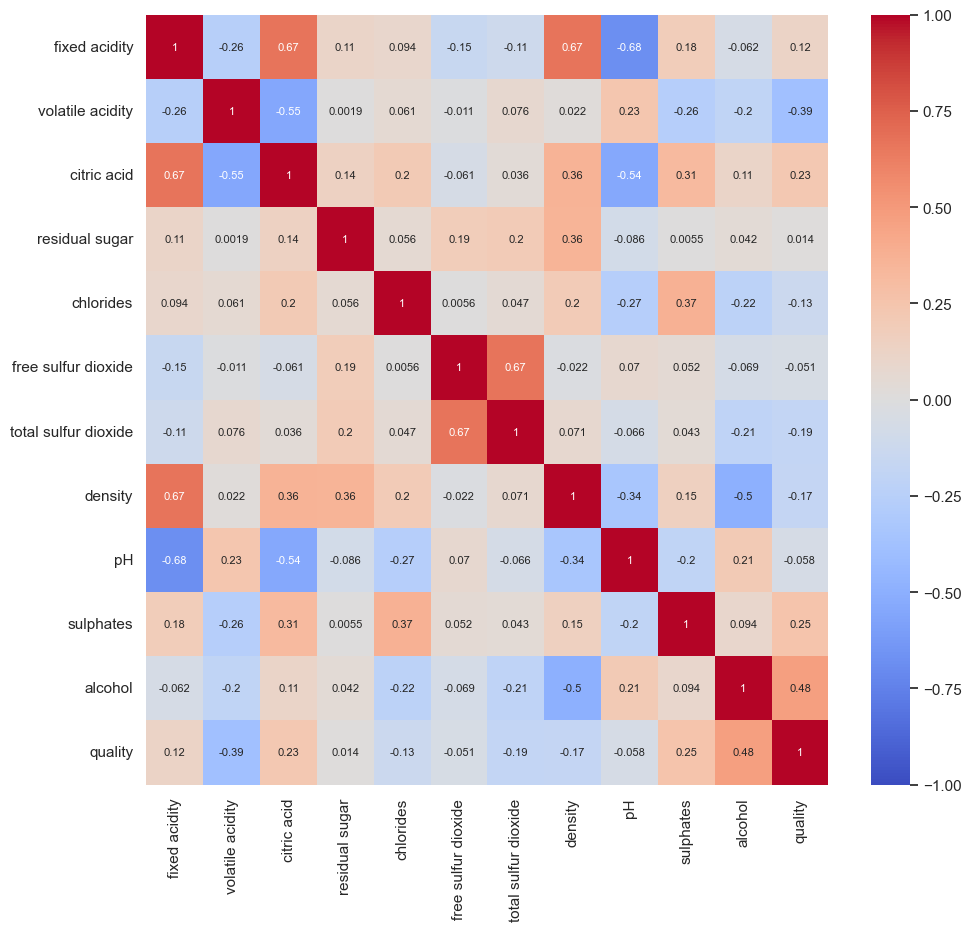

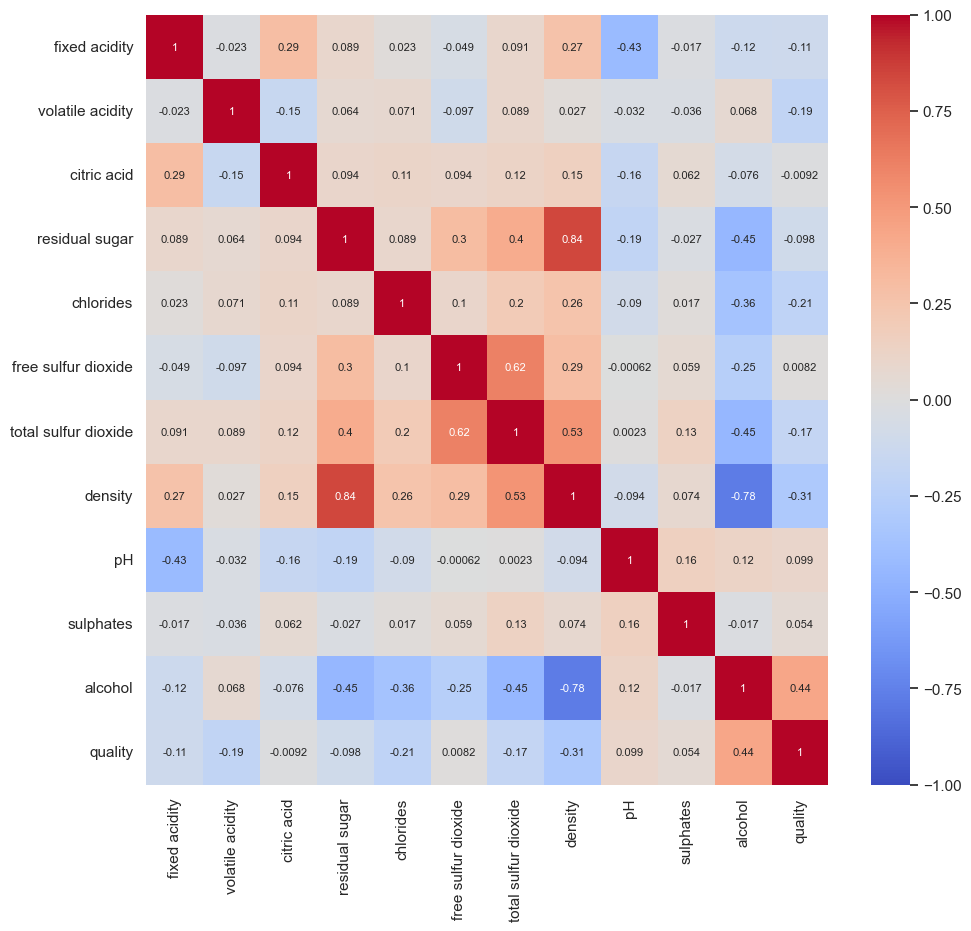

In [4]:
columnNames = dfRedWine.columns
print(f"column names = {columnNames}")

features = np.array(columnNames[0:11])
print(f"properties (features) = {features}")


t4pPC.centerTitle("Red wines")
plt.figure(figsize = (11,10))
sns.set(font_scale=1)
sns.heatmap(dfRedWine.corr(numeric_only=True), vmin = -1, vmax = +1, annot = True, cmap='coolwarm',annot_kws={"fontsize":8})
plt.show()

t4pPC.centerTitle("White wines")
plt.figure(figsize = (11,10))
sns.set(font_scale=1)
sns.heatmap(dfWhiteWine.corr(numeric_only=True), vmin = -1, vmax = +1, annot = True, cmap='coolwarm',annot_kws={"fontsize":8})
plt.show()


### Quality distribution

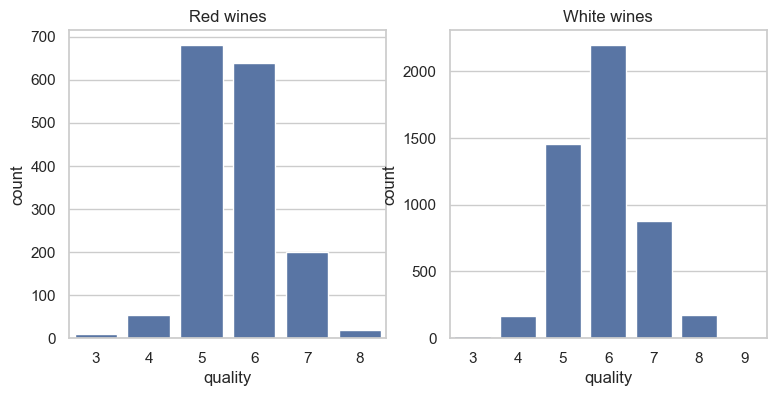

In [5]:
import matplotlib.gridspec as gridspec

sns.set_style("whitegrid")
fig=plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Red wines")
sns.countplot(dfRedWine,x='quality')
ax01=fig.add_subplot(gs[0, 1], title="White wines")
sns.countplot(dfWhiteWine,x='quality')
plt.show()

### Any possible discrimination between chemical features and quality? Boxplots

A boxplot summarizes the distribution of a numeric variable for one or several groups. It allows to quickly get the median, quartiles and outliers but also hides the dataset individual data points

/tmp/ipykernel_8858/3357852489.py:13: UserWarning: The figure layout has changed to tight
  Fig.tight_layout()


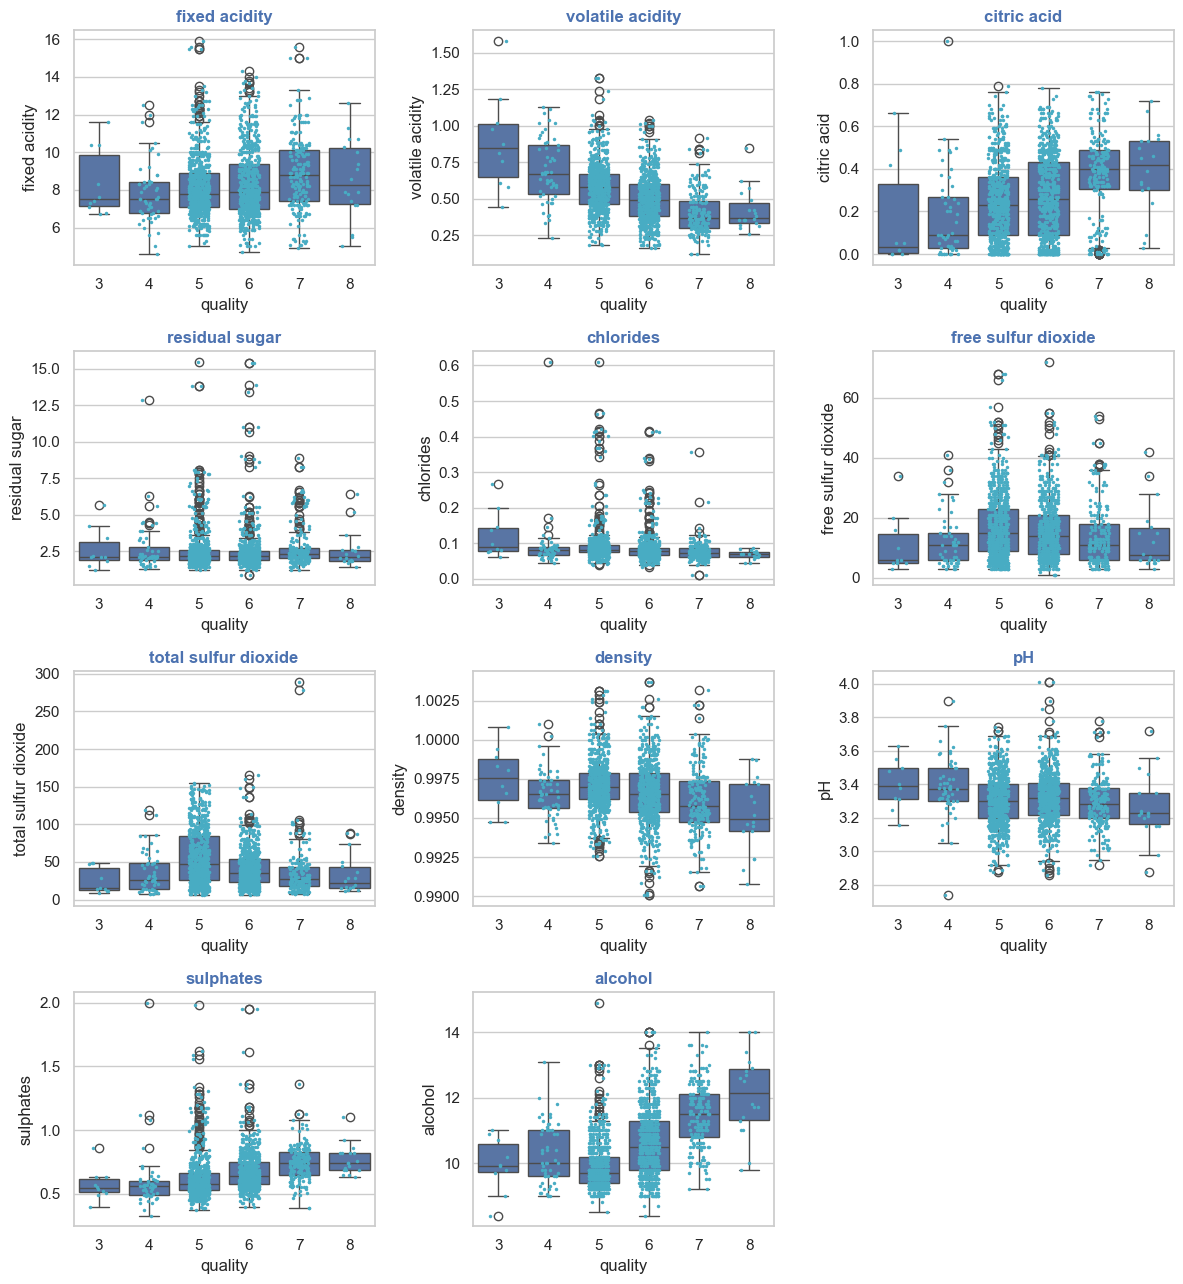

/tmp/ipykernel_8858/3357852489.py:26: UserWarning: The figure layout has changed to tight
  Fig.tight_layout()


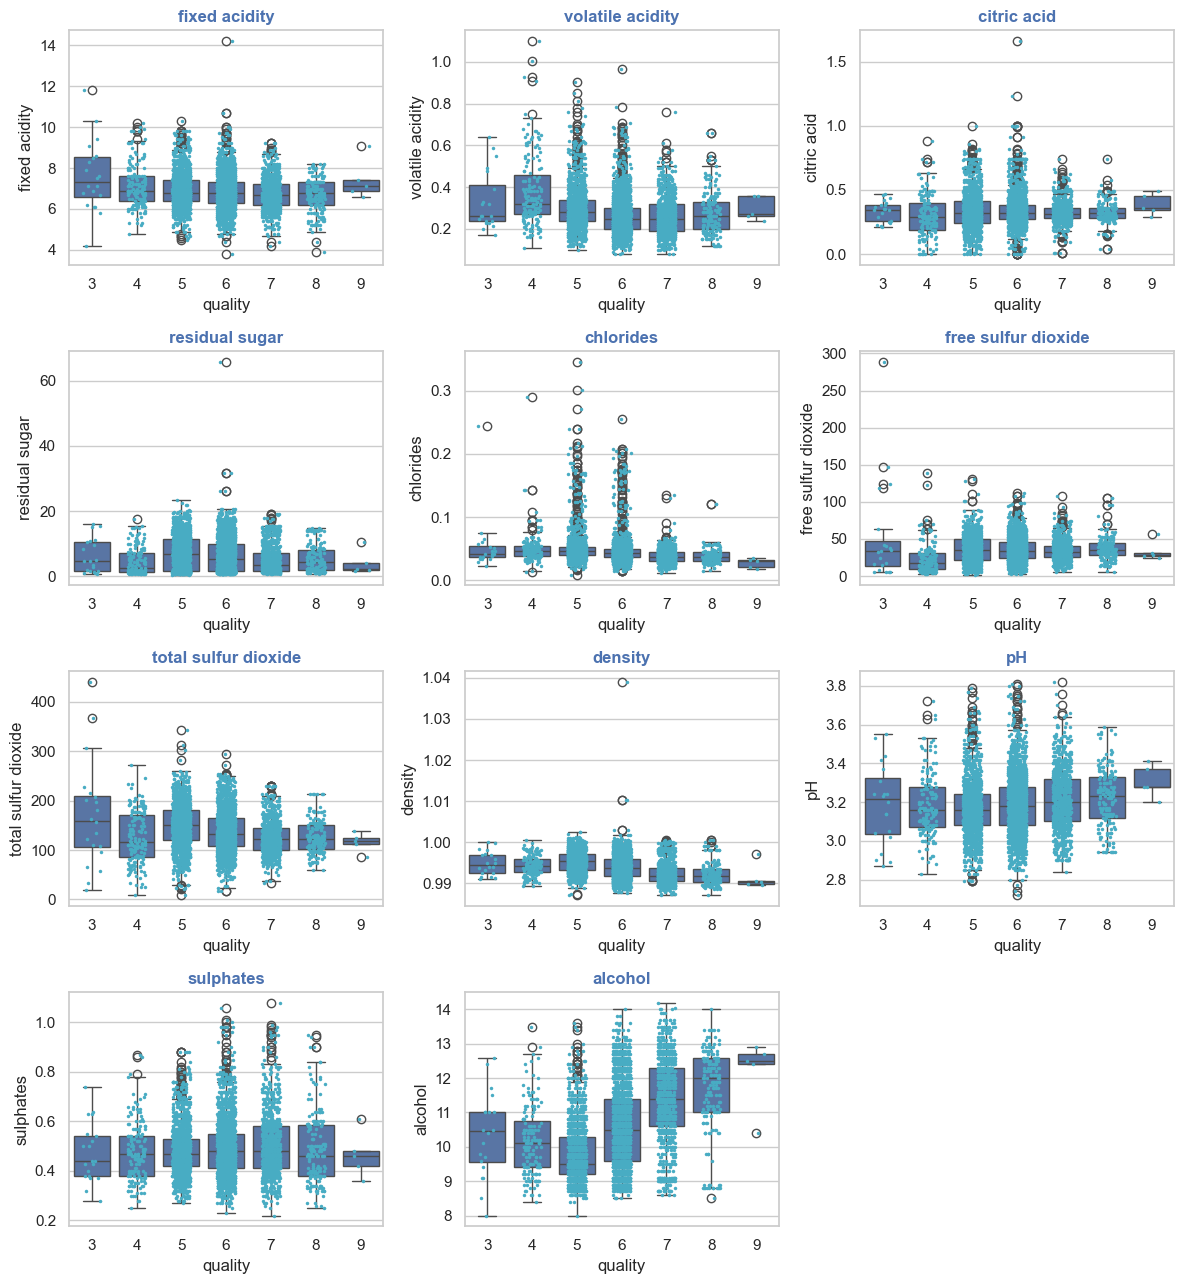

In [6]:
sns.set_style("whitegrid")

t4pPC.centerTitle("Red wines")
Fig, Graph = plt.subplots(ncols=3, nrows=4, constrained_layout=True,figsize=(12, 13), sharex=False, sharey=False)
Graph = Graph.ravel()  # array to 1D

for i,f in enumerate(features):
    sns.boxplot(dfRedWine,x='quality', y=f, ax=Graph[i])
    sns.stripplot(dfRedWine,x='quality', y=f, color="#48acc3", jitter=0.2, size=2.5,ax=Graph[i])
    Graph[i].set_title(f'{f}', fontdict = {'fontsize': 12,'fontweight': 'bold', 'color': 'b'})

Fig.delaxes(Graph[-1])  # delete the empty subplots
Fig.tight_layout()
plt.show()

t4pPC.centerTitle("White wines")
Fig, Graph = plt.subplots(ncols=3, nrows=4, constrained_layout=True,figsize=(12, 13), sharex=False, sharey=False)
Graph = Graph.ravel()  # array to 1D

for i,f in enumerate(features):
    sns.boxplot(dfWhiteWine,x='quality', y=f, ax=Graph[i])
    sns.stripplot(dfWhiteWine,x='quality', y=f, color="#48acc3", jitter=0.2, size=2.5,ax=Graph[i])
    Graph[i].set_title(f'{f}', fontdict = {'fontsize': 12,'fontweight': 'bold', 'color': 'b'})

Fig.delaxes(Graph[-1])  # delete the empty subplots
Fig.tight_layout()
plt.show()

### Are red and white wines distinguishable according to the chemical features of this database?

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


/tmp/ipykernel_8858/3696788414.py:17: UserWarning: The figure layout has changed to tight
  Fig.tight_layout()


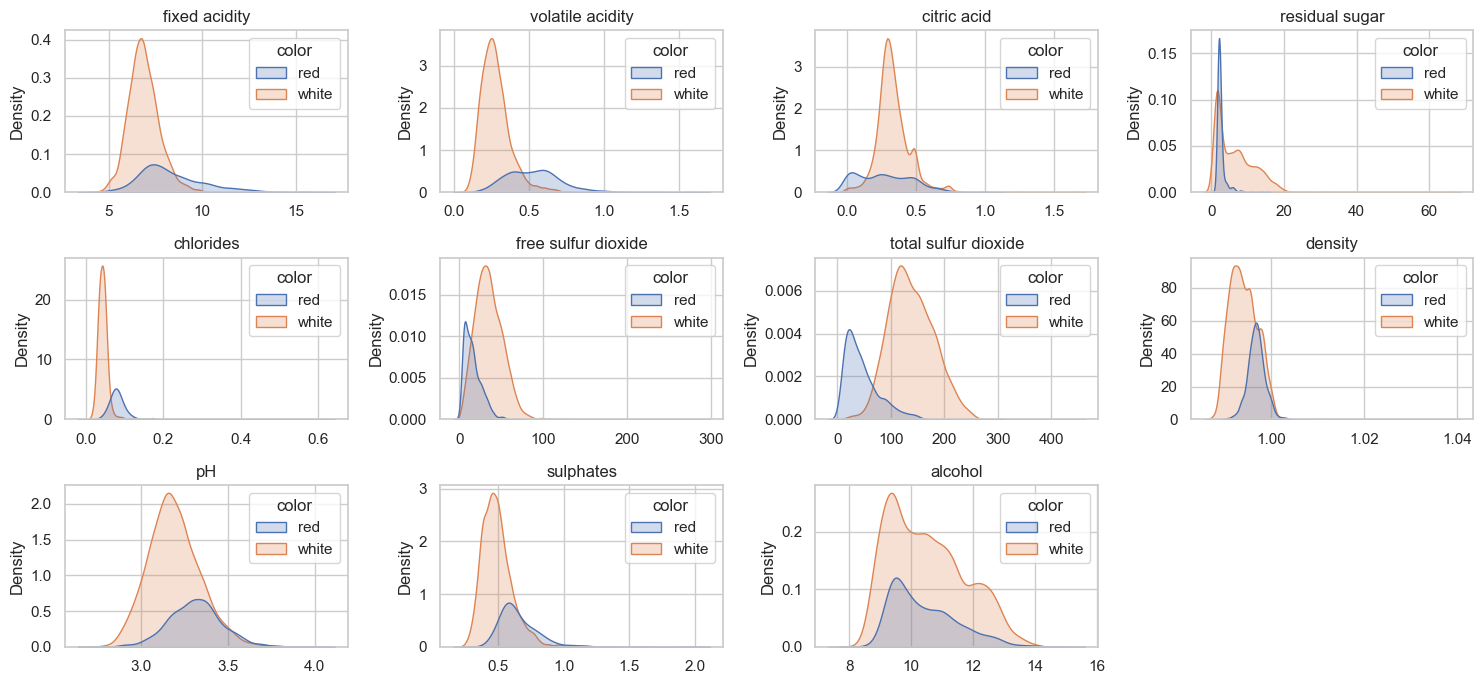

In [7]:
dfRedWine, dfWhiteWine = readWines(False)

dfRWWines = pd.concat([dfRedWine,dfWhiteWine],axis=0)
# drop=True for not adding the index column to the df
# inplace=True for updating df inplace without copying to another object. 
dfRWWines.reset_index(drop=True, inplace=True)
display(dfRWWines)

Fig, Graph = plt.subplots(ncols=4, nrows=3, constrained_layout=True,figsize=(15, 7), sharex=False, sharey=False)
Graph = Graph.ravel()  # array to 1D

for i,f in enumerate(features):
    sns.kdeplot(dfRWWines, x=f, hue='color', fill=True, ax=Graph[i])
    Graph[i].set(title=f'{f}', xlabel=None)

Fig.delaxes(Graph[-1])  # delete the empty subplots
Fig.tight_layout()
plt.show()

## 1st training: Reduction of the number of catagories, to account for the scarcity of data in some quality categories

### Make new categories

In [8]:
dfRedWine, dfWhiteWine = readWines(False)

def ReductionOfCategories(value):
    if value in [3,4]:
        return 'D_Bad'
    elif value == 5:
        return 'C_Av-'
    elif value == 6:
        return 'B_Av+'
    elif value in [7,8]:
        return 'A_Good'

dfRedWine['reduced quality'] = dfRedWine.apply(lambda row: ReductionOfCategories(row['quality']), axis=1)
display(dfRedWine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,reduced quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,C_Av-
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,C_Av-
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,C_Av-
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,B_Av+
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,C_Av-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,C_Av-
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,B_Av+
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,B_Av+
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,C_Av-


### One hot encoding

In [9]:
dftmp = dfRedWine.copy()
uv = dftmp["reduced quality"].unique()
uv = np.sort(uv)
uv = uv[::-1]
print(f"Catégories uniques : {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"Correspondance entre chaque catégorie unique et un entier : {mapc2i}")
quality_ohe = t4pPC.y2c(mapc2i,dftmp["reduced quality"])

print(f"Structure (shape) de quality_ohe : {quality_ohe.shape}")
del mapc2i
dftmp[uv]=pd.DataFrame(quality_ohe)

dfRedWine = dftmp.copy()
del dftmp
display(dfRedWine)

print(dfRedWine.groupby('reduced quality').size())

Catégories uniques : ['D_Bad' 'C_Av-' 'B_Av+' 'A_Good']
Correspondance entre chaque catégorie unique et un entier : {'D_Bad': 0, 'C_Av-': 1, 'B_Av+': 2, 'A_Good': 3}
Structure (shape) de quality_ohe : (1599, 4)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,reduced quality,D_Bad,C_Av-,B_Av+,A_Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,C_Av-,0.0,1.0,0.0,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,C_Av-,0.0,1.0,0.0,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,C_Av-,0.0,1.0,0.0,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,B_Av+,0.0,0.0,1.0,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,C_Av-,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,C_Av-,0.0,1.0,0.0,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,B_Av+,0.0,0.0,1.0,0.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,B_Av+,0.0,0.0,1.0,0.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,C_Av-,0.0,1.0,0.0,0.0


reduced quality
A_Good    217
B_Av+     638
C_Av-     681
D_Bad      63
dtype: int64


In [10]:
columnNames = dfRedWine.columns
print(f"column names = {columnNames}")
features = np.array(columnNames[0:11])
print(f"properties (features) = {features}")
target = uv
print(f"target columns = {target}")
drop_yCols = list(['quality']) + list(['color']) + list(['reduced quality']) + list(target)
print("drop_yCols = ",drop_yCols)

column names = Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'reduced quality',
       'D_Bad', 'C_Av-', 'B_Av+', 'A_Good'],
      dtype='object')
properties (features) = ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
target columns = ['D_Bad' 'C_Av-' 'B_Av+' 'A_Good']
drop_yCols =  ['quality', 'color', 'reduced quality', 'D_Bad', 'C_Av-', 'B_Av+', 'A_Good']


### Possible correlations? Heatmap, including quality criteria

<Axes: >

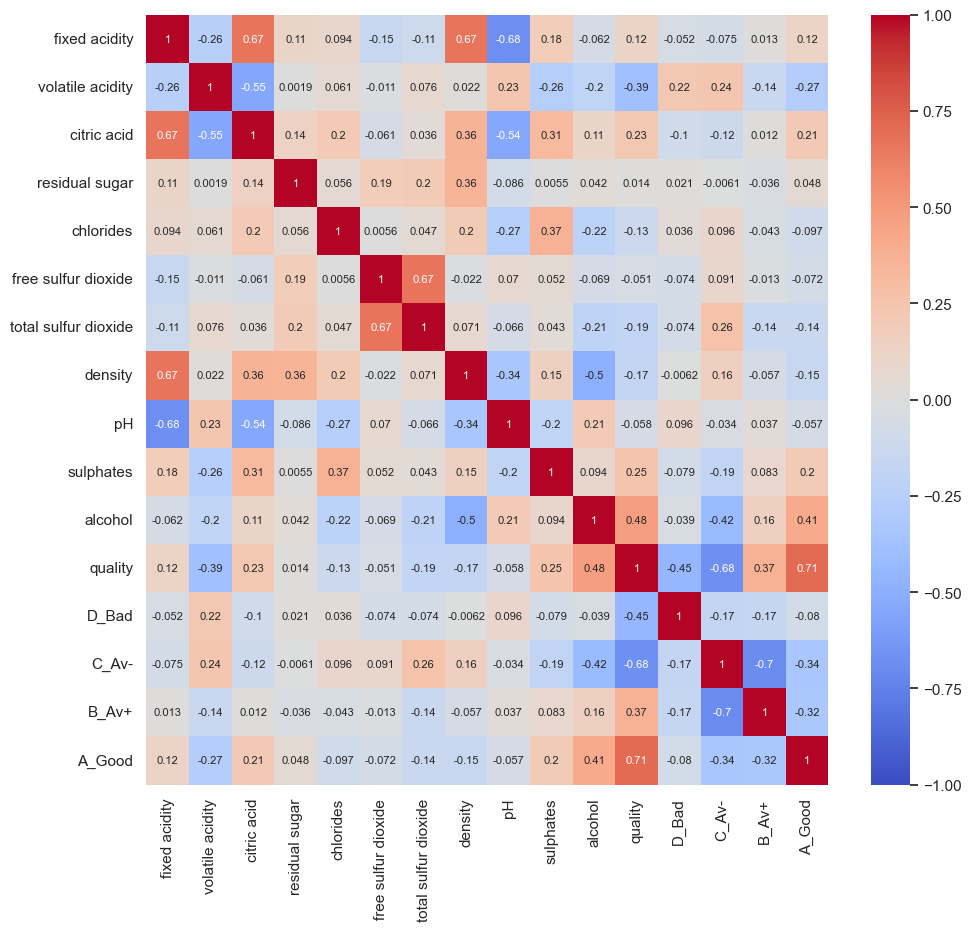

In [11]:
plt.figure(figsize = (11,10))
sns.set(font_scale=1)
sns.heatmap(dfRedWine.corr(numeric_only=True), vmin = -1, vmax = +1, annot = True, cmap='coolwarm',annot_kws={"fontsize":8})

### Training set and validation set

In [12]:
data_train = dfRedWine.sample(frac=0.8, axis=0)
data_test  = dfRedWine.drop(data_train.index)

x_train = data_train.drop(drop_yCols,axis=1)
y_train = data_train[target]
x_test  = data_test.drop(drop_yCols,axis=1)
y_test  = data_test[target]

display(x_train)
display(y_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
950,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9
1470,10.0,0.690,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7
661,7.5,0.420,0.31,1.6,0.080,15.0,42.0,0.99780,3.31,0.64,9.0
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1
1034,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7
...,...,...,...,...,...,...,...,...,...,...,...
1182,10.2,0.400,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5
848,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8
1050,7.1,0.430,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,10.4
716,8.0,0.430,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4


,D_Bad,C_Av-,B_Av+,A_Good
950,0.0,0.0,0.0,1.0
1470,0.0,1.0,0.0,0.0
661,0.0,1.0,0.0,0.0
79,1.0,0.0,0.0,0.0
1034,0.0,0.0,1.0,0.0
...,...,...,...,...
1182,0.0,0.0,1.0,0.0
848,0.0,1.0,0.0,0.0
1050,0.0,1.0,0.0,0.0
716,0.0,1.0,0.0,0.0


### Standardization

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train.values)
x_trainS = scaler.transform(x_train.values) #returns a numpy array
x_testS = scaler.transform(x_test.values) #returns a numpy array
# on va sauver x_train simplement pour faire une comparaison graphique avec le training set standardisé 
x_trainTmp = x_train.copy()
x_testTmp = x_test.copy()
# on copie maintenant les data sets standardisés en tant que nouveau training et test sets
x_train = x_trainS
x_test = x_testS


In [14]:
dftmp = pd.DataFrame(x_train,columns=x_trainTmp.columns)
display(dftmp.describe().style.format("{0:.2f}"))

dftmp = pd.DataFrame(x_test,columns=x_testTmp.columns)
display(dftmp.describe().style.format("{0:.2f}"))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.26,-1.39,-1.21,-1.60,-1.43,-1.25,-3.60,-3.79,-1.93,-1.81
25%,-0.69,-0.77,-0.92,-0.46,-0.37,-0.85,-0.75,-0.63,-0.69,-0.63,-0.87
50%,-0.21,-0.05,-0.09,-0.23,-0.17,-0.18,-0.26,0.00,-0.03,-0.22,-0.21
75%,0.51,0.62,0.79,0.07,0.06,0.49,0.51,0.62,0.56,0.43,0.64
max,4.35,4.44,3.78,9.65,11.14,5.00,7.15,3.83,4.58,7.90,3.37


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00
mean,0.22,-0.02,0.08,0.11,0.03,-0.01,0.02,0.21,-0.13,0.02,0.00
std,1.19,0.96,1.03,1.25,1.00,1.02,1.08,1.13,1.08,0.99,1.02
min,-2.01,-1.93,-1.39,-1.21,-1.60,-1.43,-1.25,-3.60,-3.00,-1.58,-1.90
25%,-0.63,-0.73,-0.87,-0.38,-0.34,-0.85,-0.75,-0.42,-0.76,-0.63,-0.87
50%,-0.09,-0.05,-0.04,-0.16,-0.15,-0.23,-0.27,0.22,-0.10,-0.16,-0.21
75%,0.89,0.57,1.01,0.09,0.10,0.59,0.45,0.78,0.49,0.49,0.54
max,4.59,5.83,2.54,9.73,6.97,5.38,7.49,3.83,4.58,7.61,4.22


### Simple ANN model

#### Definition

In [15]:
# Resets all state generated by Keras
tf.keras.backend.clear_session()

def define_model():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(11, name='iLayer'))
    model.add(keras.layers.Dense(100, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(4, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [16]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
ANNmodel=define_model()
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 20,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 100)               1200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 oLayer (Dense)              (None, 4)                 404       
                                                                 
Total params: 1604 (6.27 KB)
Trainable params: 1604 (6.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700


2024-02-07 15:44:11.328773: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


64/64 [==============================] - 1s 5ms/step - loss: 1.3350 - accuracy: 0.3784 - val_loss: 1.1204 - val_accuracy: 0.5344
Epoch 2/700
64/64 [==============================] - 0s 3ms/step - loss: 1.0896 - accuracy: 0.5379 - val_loss: 1.0284 - val_accuracy: 0.5406
Epoch 3/700
64/64 [==============================] - 0s 3ms/step - loss: 0.9941 - accuracy: 0.5637 - val_loss: 0.9771 - val_accuracy: 0.5906
Epoch 4/700
64/64 [==============================] - 0s 3ms/step - loss: 0.9489 - accuracy: 0.5794 - val_loss: 0.9580 - val_accuracy: 0.5906
Epoch 5/700
64/64 [==============================] - 0s 3ms/step - loss: 0.9438 - accuracy: 0.5911 - val_loss: 0.9515 - val_accuracy: 0.5781
Epoch 6/700
64/64 [==============================] - 0s 3ms/step - loss: 0.9233 - accuracy: 0.5919 - val_loss: 0.9457 - val_accuracy: 0.5813
Epoch 7/700
64/64 [==============================] - 0s 2ms/step - loss: 0.8909 - accuracy: 0.6177 - val_loss: 0.9379 - val_accuracy: 0.5906
Epoch 8/700
64/64 [======

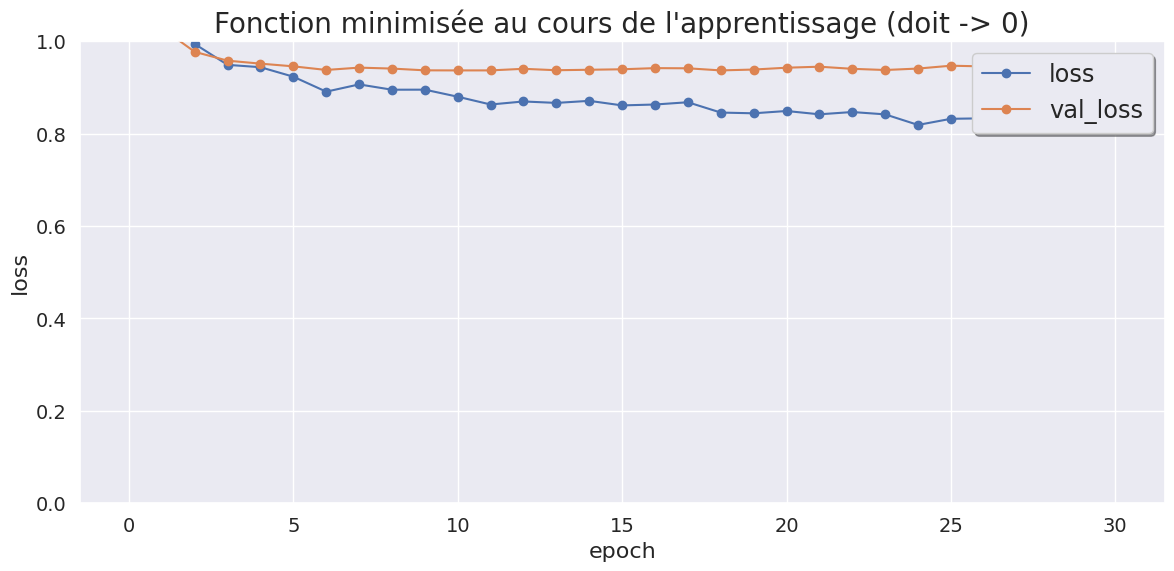

In [17]:
# c'est pratique d'utiliser un dataframe et les fonctions de tracé associées
df=pd.DataFrame(data=ANNhistory.history)
plt.rcParams["figure.figsize"] = (14,6)
# on va d'abord tracer les courbes de la fonction qui a été minimisée au cours de l'apprentissage
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,1.0])
figLOSS.set_title("Fonction minimisée au cours de l'apprentissage (doit -> 0)", size=20)
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')


#### Confusion matrix

10/10 [==============================] - 0s 2ms/step


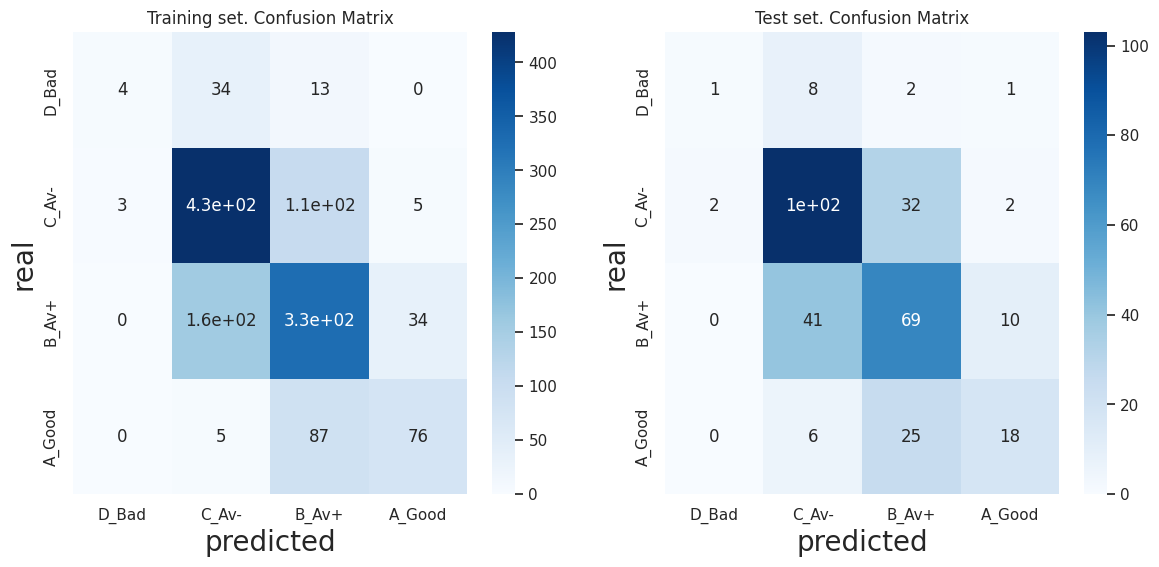

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec


y_train_hat=ANNmodel.predict(x_train)
y_test_hat=ANNmodel.predict(x_test)

cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
cm_tt = confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), np.argmax(y_test_hat,axis=1))

fig=plt.figure()
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tr, columns=target, index=target), ax=ax00, cmap=plt.cm.Blues, annot = True)
ax00.set_xlabel("predicted", fontsize = 20)
ax00.set_ylabel("real", fontsize = 20)

ax01=fig.add_subplot(gs[0, 1], title="Test set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tt, columns=target, index=target), ax=ax01, cmap=plt.cm.Blues, annot = True)
ax01.set_xlabel("predicted", fontsize = 20)
ax01.set_ylabel("real", fontsize = 20)
plt.show()

#### Explainability

In [19]:
import shap

# select a set of background examples to take an expectation over
background = x_train.copy()
explainer = shap.DeepExplainer(ANNmodel, background)

shap_values_train = explainer.shap_values(x_train)
shap_values_test = explainer.shap_values(x_test)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


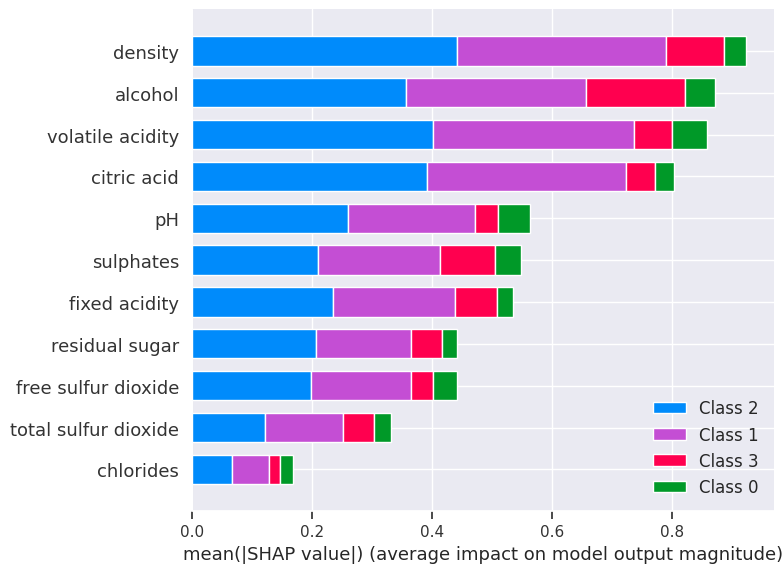

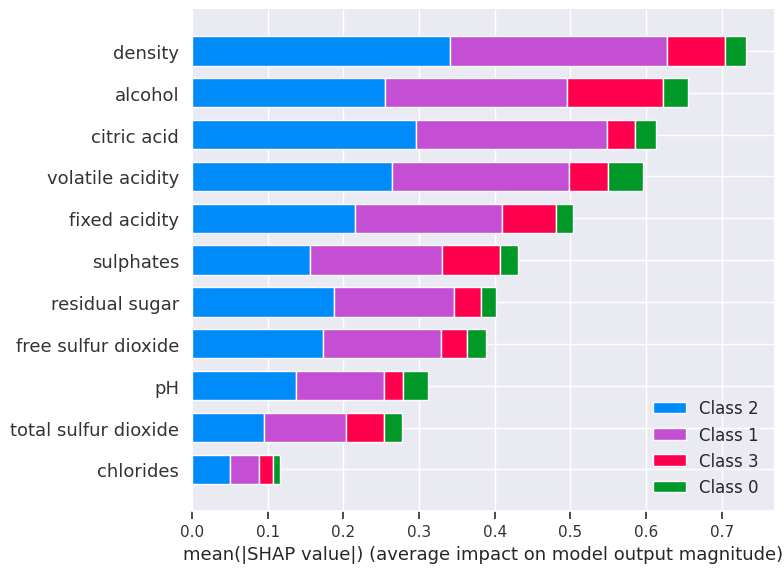

In [20]:
t4pPC.centerTitle("Train")
shap.summary_plot(shap_values_train,x_train, feature_names = features)
t4pPC.centerTitle("Test")
shap.summary_plot(shap_values_test,x_test, feature_names = features)

### Deep learning

#### Model

In [32]:
# Resets all state generated by Keras
tf.keras.backend.clear_session()

def define_model():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(11, name='iLayer'))
    model.add(keras.layers.Dense(50, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(50, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(50, activation='relu', name='hLayer3'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(50, activation='relu', name='hLayer4'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(4, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [34]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
DLANNmodel=define_model()
DLANNmodel.summary()
vID.chrono_start()
DLANNhistory = DLANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 20,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 50)                600       
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 hLayer2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 hLayer3 (Dense)             (None, 50)                2550      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 hLayer4 (Dense)             (None, 50)               

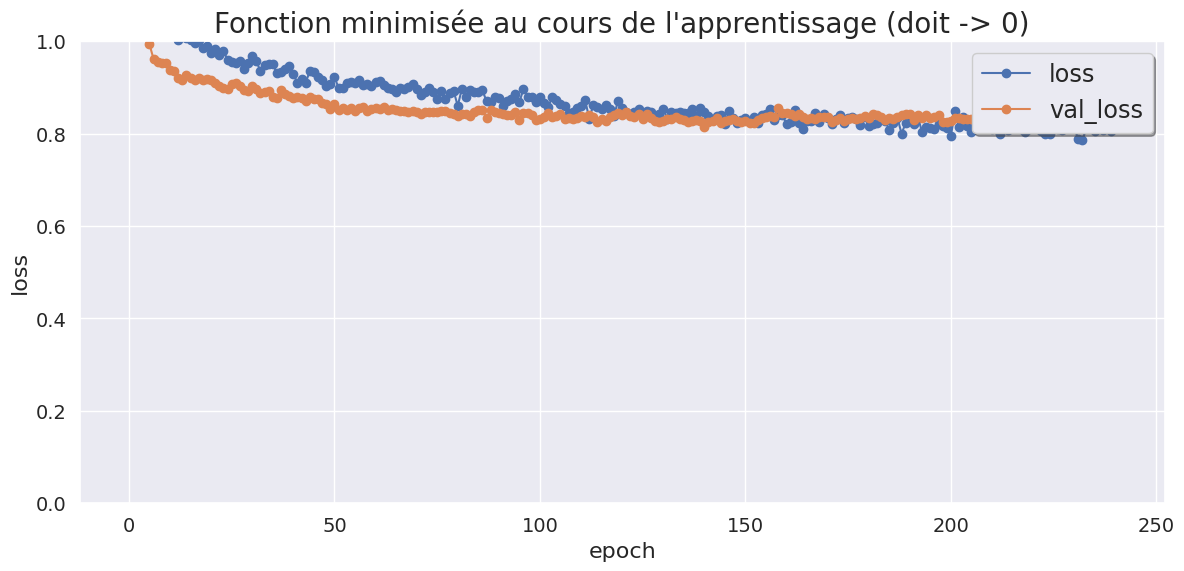

In [35]:
# c'est pratique d'utiliser un dataframe et les fonctions de tracé associées
df=pd.DataFrame(data=DLANNhistory.history)
plt.rcParams["figure.figsize"] = (14,6)
# on va d'abord tracer les courbes de la fonction qui a été minimisée au cours de l'apprentissage
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,1.0])
figLOSS.set_title("Fonction minimisée au cours de l'apprentissage (doit -> 0)", size=20)
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')


#### Confusion matrix

10/10 [==============================] - 0s 2ms/step


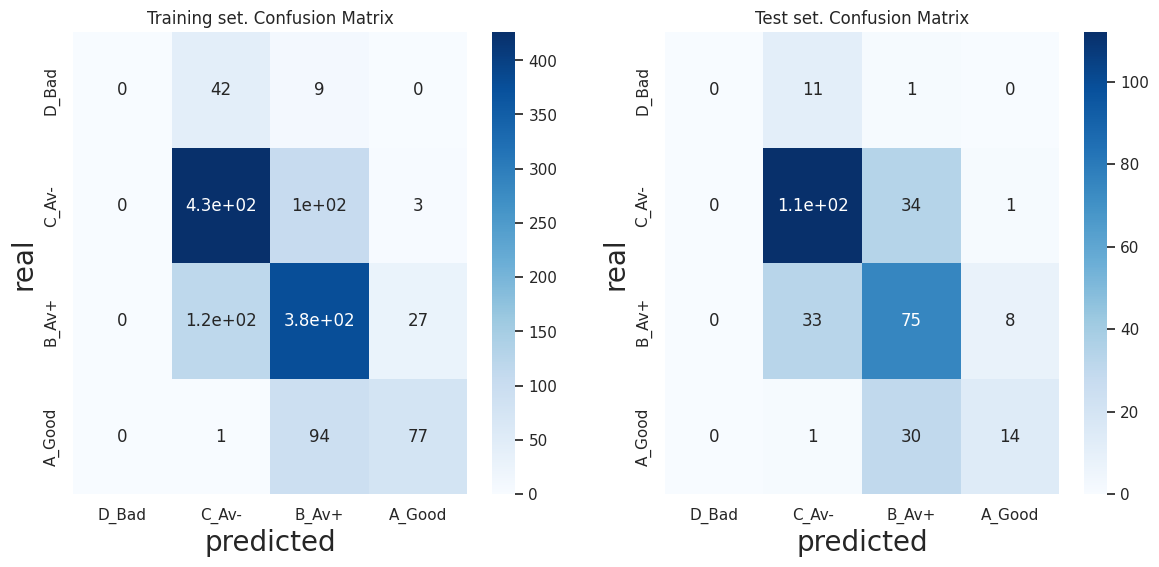

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec


y_train_hat = DLANNmodel.predict(x_train)
y_test_hat = DLANNmodel.predict(x_test)

cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
cm_tt = confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), np.argmax(y_test_hat,axis=1))

fig=plt.figure()
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tr, columns=target, index=target), ax=ax00, cmap=plt.cm.Blues, annot = True)
ax00.set_xlabel("predicted", fontsize = 20)
ax00.set_ylabel("real", fontsize = 20)

ax01=fig.add_subplot(gs[0, 1], title="Test set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tt, columns=target, index=target), ax=ax01, cmap=plt.cm.Blues, annot = True)
ax01.set_xlabel("predicted", fontsize = 20)
ax01.set_ylabel("real", fontsize = 20)
plt.show()

#### Explainability

In [52]:
import shap

# select a set of background examples to take an expectation over
background = x_train.copy()
explainer = shap.DeepExplainer(DLANNmodel, background)

shap_values_train = explainer.shap_values(x_train)
shap_values_test = explainer.shap_values(x_test)


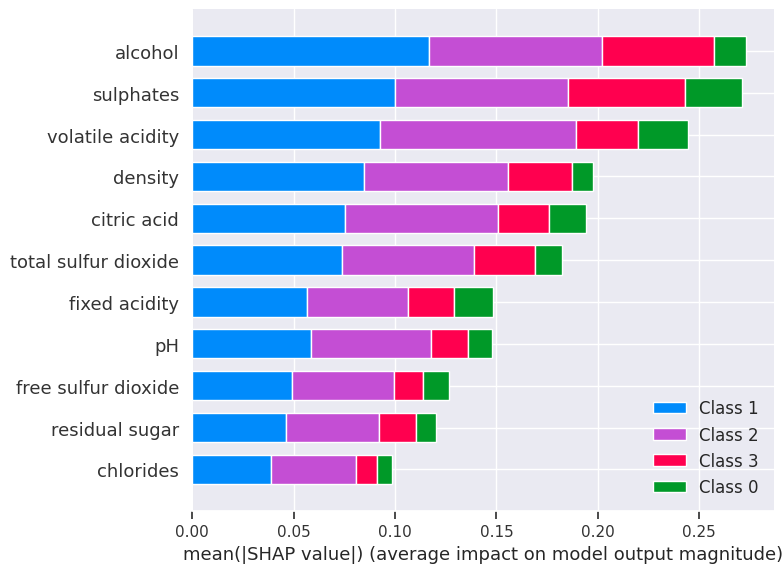

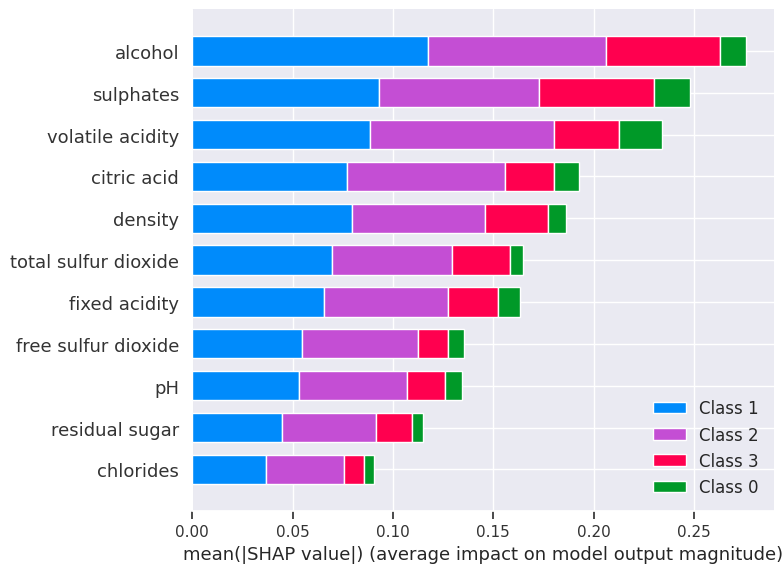

In [53]:
t4pPC.centerTitle("Train")
shap.summary_plot(shap_values_train,x_train, feature_names = features)
t4pPC.centerTitle("Test")
shap.summary_plot(shap_values_test,x_test, feature_names = features)

## Identification of red vs. white

### Concat the red and white dataframes

In [12]:
dfRedWine, dfWhiteWine = readWines(False)

dfRWWines = pd.concat([dfRedWine,dfWhiteWine],axis=0)
# drop=True for not adding the index column to the df
# inplace=True for updating df inplace without copying to another object. 
dfRWWines.reset_index(drop=True, inplace=True)
display(dfRWWines)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### One hot encoding

In [13]:
dftmp = dfRWWines.copy()
uv = dftmp["color"].unique()
print(f"Catégories uniques : {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"Correspondance entre chaque catégorie unique et un entier : {mapc2i}")
color_ohe = t4pPC.y2c(mapc2i,dftmp["color"])

print(f"Structure (shape) de color_ohe : {color_ohe.shape}")
del mapc2i
dftmp[uv]=pd.DataFrame(color_ohe)

dfRWWines = dftmp.copy()
del dftmp
display(dfRWWines)

print(dfRWWines.groupby('color').size())

Catégories uniques : ['red' 'white']
Correspondance entre chaque catégorie unique et un entier : {'red': 0, 'white': 1}
Structure (shape) de color_ohe : (6497, 2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0.0,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0.0,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0.0,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0.0,1.0


color
red      1599
white    4898
dtype: int64


### Possible correlations? Heatmap

<Axes: >

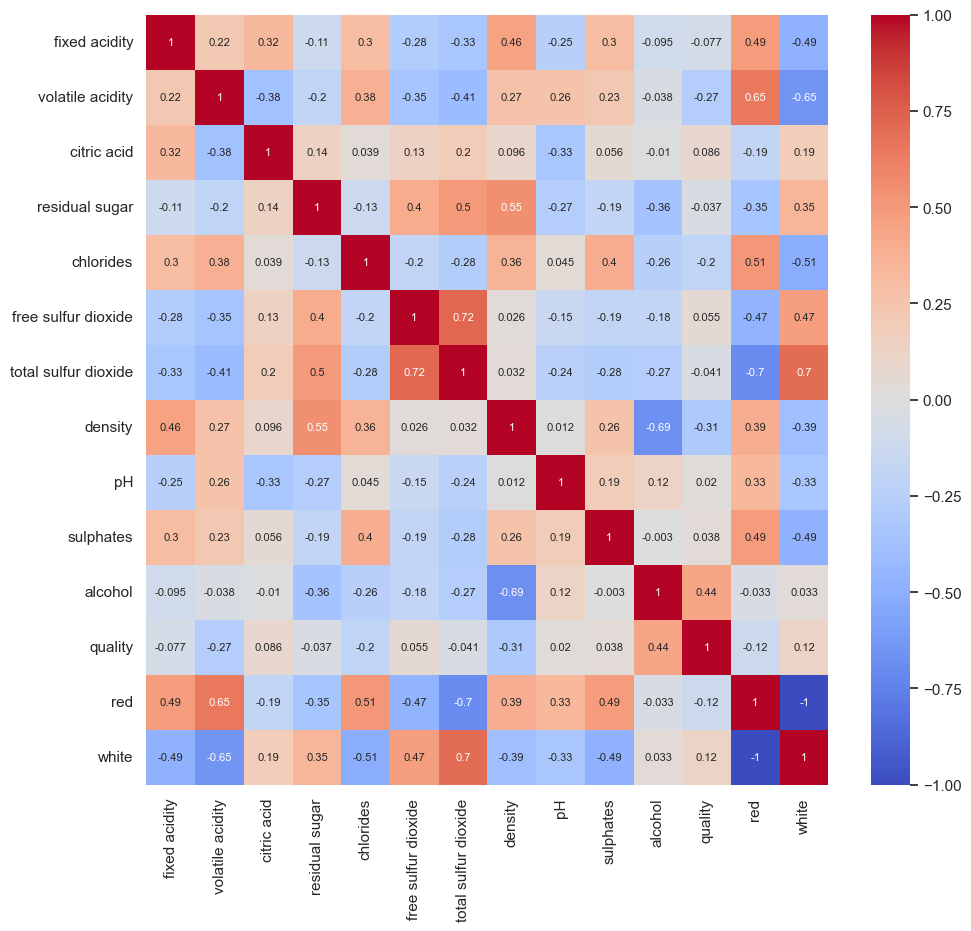

In [14]:
plt.figure(figsize = (11,10))
sns.set(font_scale=1)
sns.heatmap(dfRWWines.corr(numeric_only=True), vmin = -1, vmax = +1, annot = True, cmap='coolwarm',annot_kws={"fontsize":8})

### Training and validation sets

In [15]:
print(f"properties (features) = {features}")
target = ["red","white"]
drop_yCols = ['quality','color','red','white']
print(drop_yCols)

properties (features) = ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
['quality', 'color', 'red', 'white']


In [16]:
data_train = dfRWWines.sample(frac=0.8, axis=0)
data_test  = dfRWWines.drop(data_train.index)

x_train = data_train.drop(drop_yCols,axis=1)
x_train_unscaled = x_train.copy()
y_train = data_train[target]
x_test  = data_test.drop(drop_yCols,axis=1)
x_test_unscaled = x_test.copy()
y_test  = data_test[target]

display(x_train)
display(y_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
709,9.7,0.31,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0
424,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9
324,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
4986,7.6,0.36,0.49,11.3,0.046,87.0,221.0,0.99840,3.01,0.43,9.2
...,...,...,...,...,...,...,...,...,...,...,...
225,7.7,0.43,0.25,2.6,0.073,29.0,63.0,0.99615,3.37,0.58,10.5
5448,8.2,0.31,0.43,7.0,0.047,18.0,87.0,0.99628,3.23,0.64,10.6
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4
3208,8.1,0.20,0.49,11.8,0.048,46.0,212.0,0.99680,3.09,0.46,10.0


,red,white
709,1.0,0.0
424,1.0,0.0
86,1.0,0.0
324,1.0,0.0
4986,0.0,1.0
...,...,...
225,1.0,0.0
5448,0.0,1.0
258,1.0,0.0
3208,0.0,1.0


### Standardization

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train.values)
x_trainS = scaler.transform(x_train.values) #returns a numpy array
x_testS = scaler.transform(x_test.values) #returns a numpy array
# on va sauver x_train simplement pour faire une comparaison graphique avec le training set standardisé 
x_trainTmp = x_train.copy()
x_testTmp = x_test.copy()
# on copie maintenant les data sets standardisés en tant que nouveau training et test sets
x_train = x_trainS
x_test = x_testS


In [18]:
dftmp = pd.DataFrame(x_train,columns=x_trainTmp.columns)
display(dftmp.describe().style.format("{0:.2f}"))

dftmp = pd.DataFrame(x_test,columns=x_testTmp.columns)
display(dftmp.describe().style.format("{0:.2f}"))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5198.00,5198.00,5198.00,5198.00,5198.00,5198.00,5198.00,5198.00,5198.00,5198.00,5198.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.63,-1.58,-2.18,-1.03,-1.34,-1.59,-1.92,-2.57,-2.98,-2.09,-2.08
25%,-0.64,-0.68,-0.47,-0.77,-0.52,-0.75,-0.69,-0.81,-0.68,-0.69,-0.83
50%,-0.18,-0.25,-0.06,-0.53,-0.26,-0.08,0.05,0.07,-0.06,-0.15,-0.17
75%,0.36,0.41,0.49,0.58,0.28,0.60,0.71,0.78,0.62,0.45,0.67
max,6.66,7.48,9.16,5.60,15.78,14.52,5.74,5.27,4.91,9.79,3.66


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1299.00,1299.00,1299.00,1299.00,1299.00,1299.00,1299.00,1299.00,1299.00,1299.00,1299.00
mean,-0.06,-0.07,-0.01,0.05,-0.01,0.05,0.07,-0.01,-0.03,-0.06,-0.03
std,0.97,0.97,0.96,1.08,0.98,0.98,0.99,1.07,0.99,0.96,0.95
min,-2.17,-1.46,-2.18,-0.98,-1.20,-1.65,-1.91,-2.35,-3.10,-1.89,-1.66
25%,-0.64,-0.74,-0.47,-0.77,-0.54,-0.69,-0.56,-0.78,-0.68,-0.69,-0.83
50%,-0.25,-0.37,-0.06,-0.43,-0.26,-0.08,0.13,-0.00,-0.12,-0.22,-0.17
75%,0.21,0.29,0.49,0.58,0.20,0.65,0.78,0.74,0.62,0.38,0.67
max,6.42,5.97,4.65,12.92,10.40,5.65,4.44,14.97,4.91,7.05,2.91


### Definition of a simple ANN model

#### Model

In [29]:
# Resets all state generated by Keras
tf.keras.backend.clear_session()

def define_model():

    
    model = keras.models.Sequential()
    model.add(keras.layers.Input((11,), name='iLayer'))
    model.add(keras.layers.Dense(50, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(2, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [ ]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
ANNmodel=define_model()
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 250,
                    batch_size      = 20,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                 │ (None, 50)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oLayer (Dense)                  │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702 (2.74 KB)

 Trainable params: 702 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8010 - loss: 0.4190 - val_accuracy: 0.9900 - val_loss: 0.0687
Epoch 2/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0818 - val_accuracy: 0.9915 - val_loss: 0.0461
Epoch 3/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0497 - val_accuracy: 0.9915 - val_loss: 0.0423
Epoch 4/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0414 - val_accuracy: 0.9915 - val_loss: 0.0415
Epoch 5/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0307 - val_accuracy: 0.9908 - val_loss: 0.0426
Epoch 6/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0376 - val_accuracy: 0.9908 - val_loss: 0.0416
Epoch 7/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0297 - val_accuracy: 0.9923 - val_loss: 0.0400
Epoch 8/700
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0363 - val_accu

In [ ]:
# c'est pratique d'utiliser un dataframe et les fonctions de tracé associées
df=pd.DataFrame(data=ANNhistory.history)
plt.rcParams["figure.figsize"] = (14,6)
# on va d'abord tracer les courbes de la fonction qui a été minimisée au cours de l'apprentissage
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,0.3])
figLOSS.set_title("Fonction minimisée au cours de l'apprentissage (doit -> 0)", size=20)
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')


#### Confusion matrix

tf.Tensor([0.24526426 0.75473577], shape=(2,), dtype=float32)
41/41 [==============================] - 0s 2ms/step


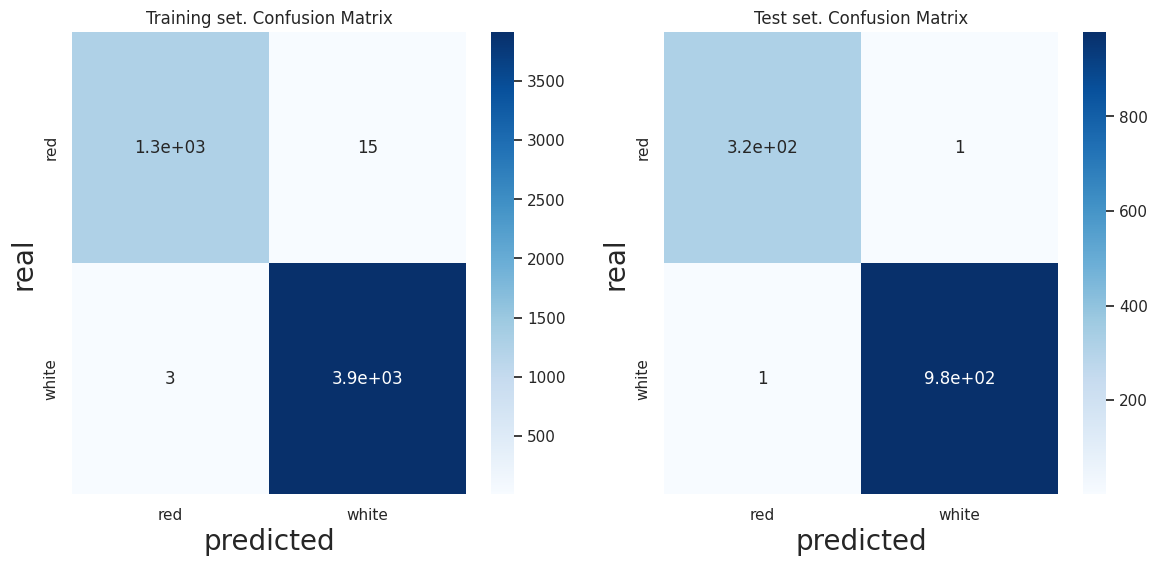

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec

print(explainer.expected_value)

y_train_hat=ANNmodel.predict(x_train)
y_test_hat=ANNmodel.predict(x_test)

cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
cm_tt = confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), np.argmax(y_test_hat,axis=1))

fig=plt.figure()
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tr, columns=target, index=target), ax=ax00, cmap=plt.cm.Blues, annot = True)
ax00.set_xlabel("predicted", fontsize = 20)
ax00.set_ylabel("real", fontsize = 20)

ax01=fig.add_subplot(gs[0, 1], title="Test set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tt, columns=target, index=target), ax=ax01, cmap=plt.cm.Blues, annot = True)
ax01.set_xlabel("predicted", fontsize = 20)
ax01.set_ylabel("real", fontsize = 20)
plt.show()

#### Explainability

<div class="intro">

First select 500 samples
</div>

In [118]:
display(np.random.choice(x_train.shape[0], size=500, replace=False, p=None))

array([4333, 1021, 3934, 4097, 5093, 2878, 1994, 1091, 1844, 2672, 3618,
       4988,  191,  262, 1965, 3646, 4152, 4990, 1713, 3574, 3735, 3336,
       4335,  277, 2380, 3432, 2597, 1129,  929,  388, 3323, 4610, 3938,
       4004, 2859, 3862, 2743, 2425, 3653, 2121, 4510, 4146, 2837, 4722,
       5142,  404,  761, 1812,   79, 3339, 1876, 4252, 1077, 4915, 1372,
       2850, 2974,  895, 3694, 5064, 1243, 2893, 3254, 1673, 1583, 2357,
       2669,  326, 3237, 4265, 1023, 1631, 1262, 4222, 3508, 1449, 4053,
       2508,  162, 1577, 2231,  977, 4839,  680, 2287, 4774, 3896, 1336,
       3917, 3024, 3826, 2657,  629, 1494, 3053, 1400,  274, 3872, 1189,
       2364,  614, 3760, 1667,  741, 1195, 1268,  252, 3436, 4794,  883,
        685, 1853, 1218, 3206,  130, 5140, 1287, 4172, 1616, 3924, 2112,
       2758, 1651, 5025, 1956, 4551,  804, 4868, 1921, 4652, 2768,  354,
       1328, 3177, 4533,  454, 4427, 4409,  997, 1750, 3494, 2912, 2427,
       3021, 1662, 2559, 3081,  361, 2838, 3489,  8

In [119]:
import shap

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], size=500, replace=False, p=None)]
explainer = shap.DeepExplainer(ANNmodel, background)

shap_values_train = explainer.shap_values(x_train)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


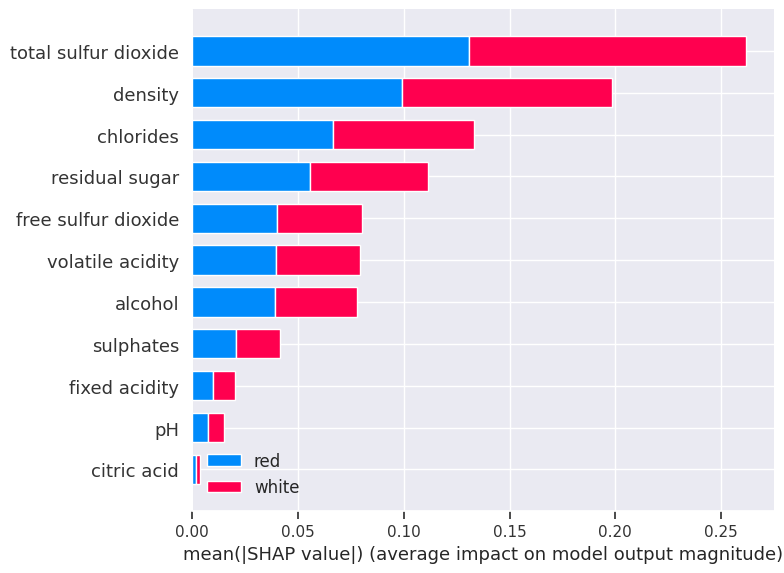

In [120]:
t4pPC.centerTitle("Red vs. whitewines")
shap.summary_plot(shap_values_train,x_train, feature_names = features, class_names=target)

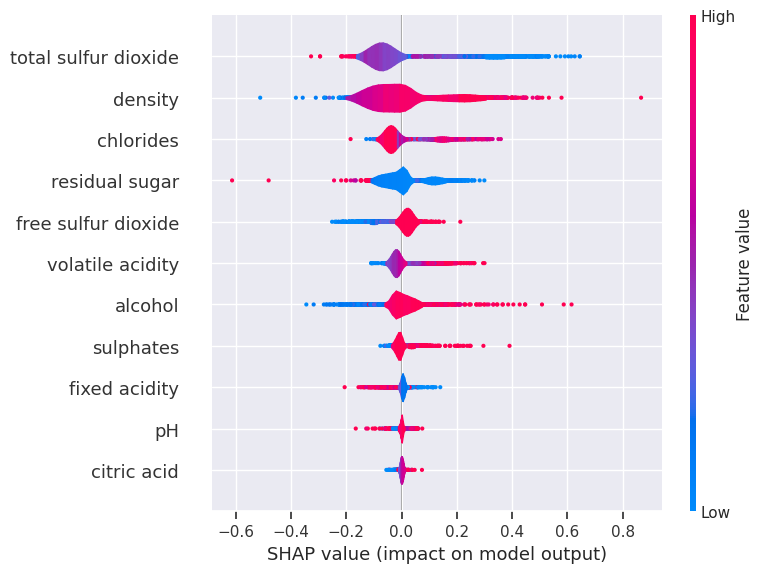

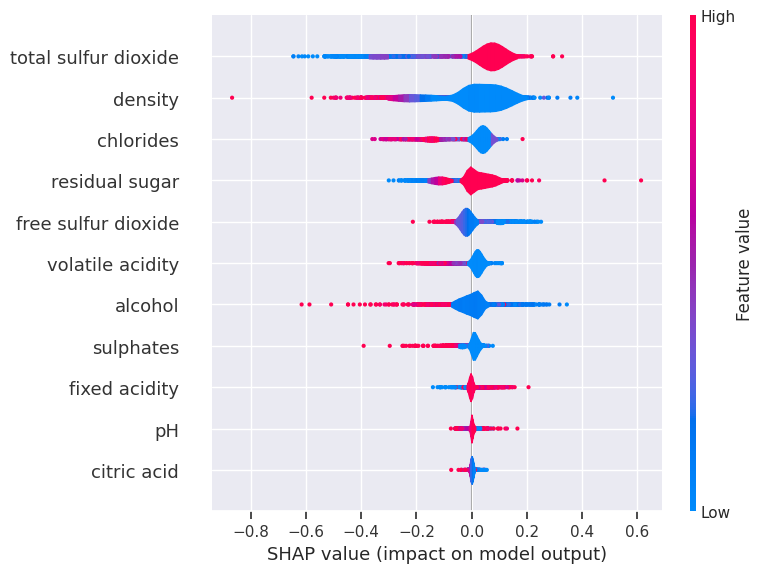

In [121]:
t4pPC.centerTitle(f"Train. Successive summary plots for {target[0]} wines")
shap.summary_plot(shap_values_train[0],x_train, plot_type="violin",feature_names=features,show=True)
t4pPC.centerTitle(f"Train. Successive summary plots for {target[1]} wines")
shap.summary_plot(shap_values_train[1],x_train, plot_type="violin",feature_names=features,show=True)

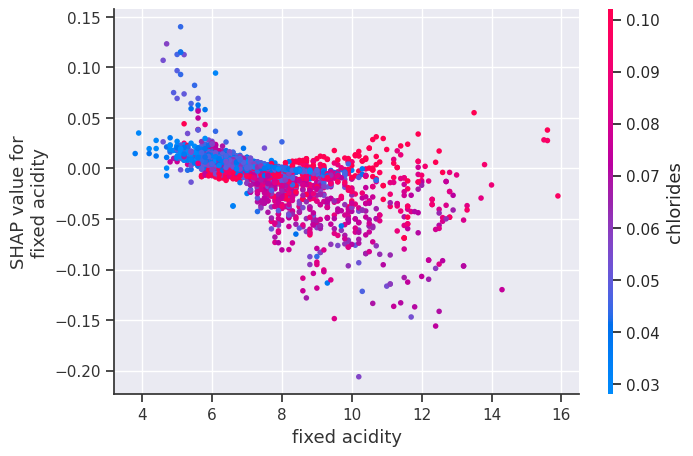

In [122]:
shap.dependence_plot(0, shap_values_train[0], x_train_unscaled, feature_names=features)

### Deep learning
 
#### Model

In [123]:
# Resets all state generated by Keras
tf.keras.backend.clear_session()

def define_model():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(11, name='iLayer'))
    model.add(keras.layers.Dense(128, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(128, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(2, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [124]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
ANNmodel=define_model()
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 20,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hLayer2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 oLayer (Dense)              (None, 2)                 258       
                                                                 
Total params: 18306 (71.51 KB)
Trainable params: 18306 (71.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700
260/260 

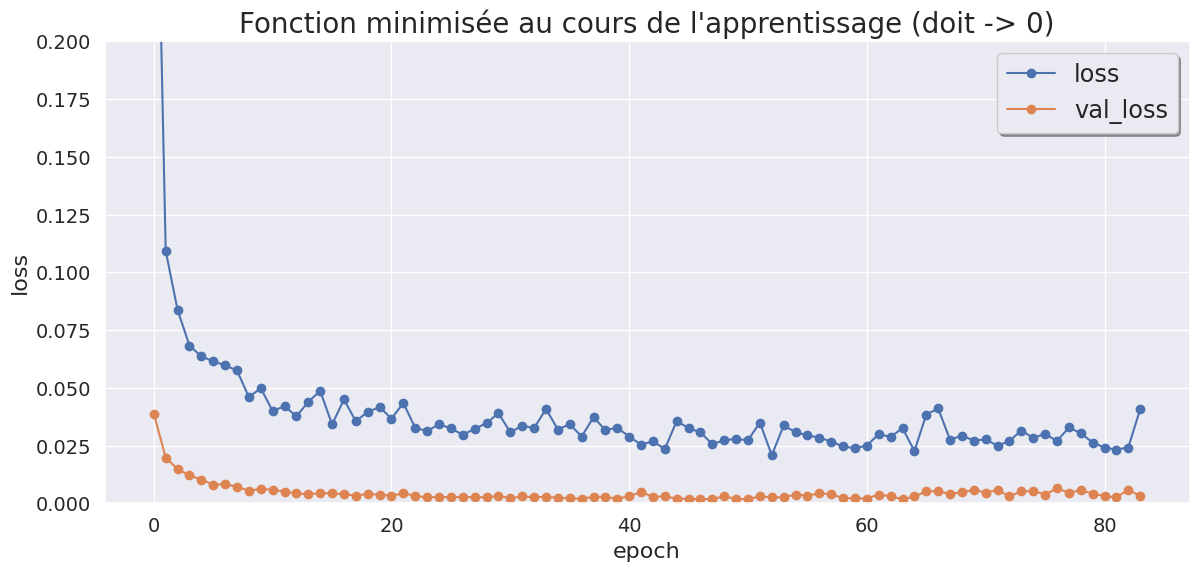

In [125]:
# c'est pratique d'utiliser un dataframe et les fonctions de tracé associées
df=pd.DataFrame(data=ANNhistory.history)
plt.rcParams["figure.figsize"] = (14,6)
# on va d'abord tracer les courbes de la fonction qui a été minimisée au cours de l'apprentissage
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,0.2])
figLOSS.set_title("Fonction minimisée au cours de l'apprentissage (doit -> 0)", size=20)
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')


#### Confusion matrix

41/41 [==============================] - 0s 3ms/step


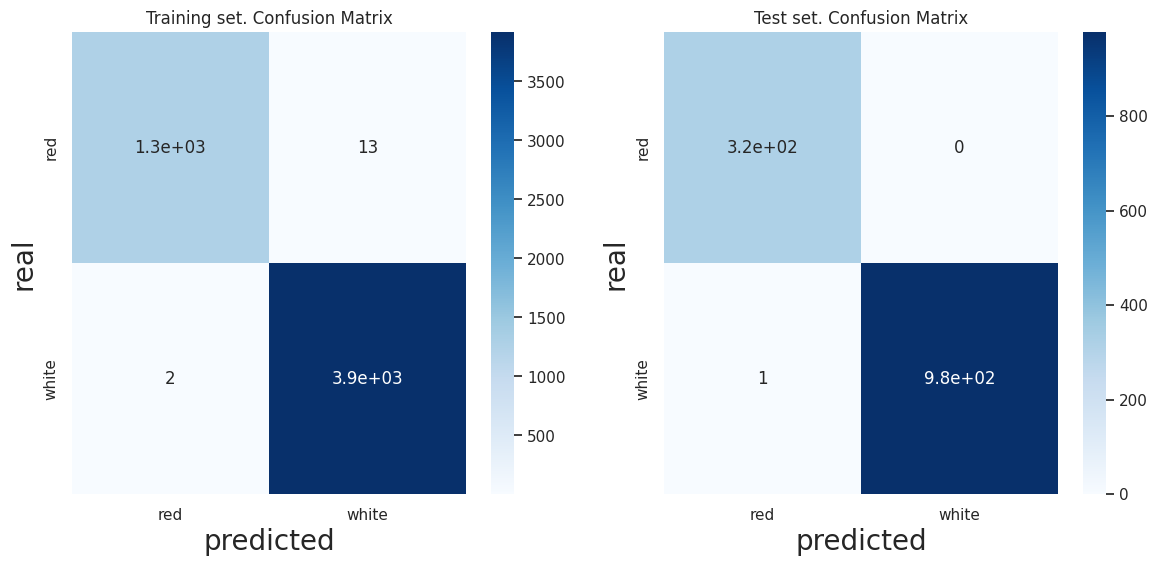

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec

y_train_hat=ANNmodel.predict(x_train)
y_test_hat=ANNmodel.predict(x_test)

cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
cm_tt = confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), np.argmax(y_test_hat,axis=1))

fig=plt.figure()
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tr, columns=target, index=target), ax=ax00, cmap=plt.cm.Blues, annot = True)
ax00.set_xlabel("predicted", fontsize = 20)
ax00.set_ylabel("real", fontsize = 20)

ax01=fig.add_subplot(gs[0, 1], title="Test set. Confusion Matrix")
sns.heatmap(pd.DataFrame(cm_tt, columns=target, index=target), ax=ax01, cmap=plt.cm.Blues, annot = True)
ax01.set_xlabel("predicted", fontsize = 20)
ax01.set_ylabel("real", fontsize = 20)
plt.show()

#### Explainability

In [127]:
import shap

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], size=500, replace=False, p=None)]
explainer = shap.DeepExplainer(ANNmodel, background)

shap_values_train = explainer.shap_values(x_train)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


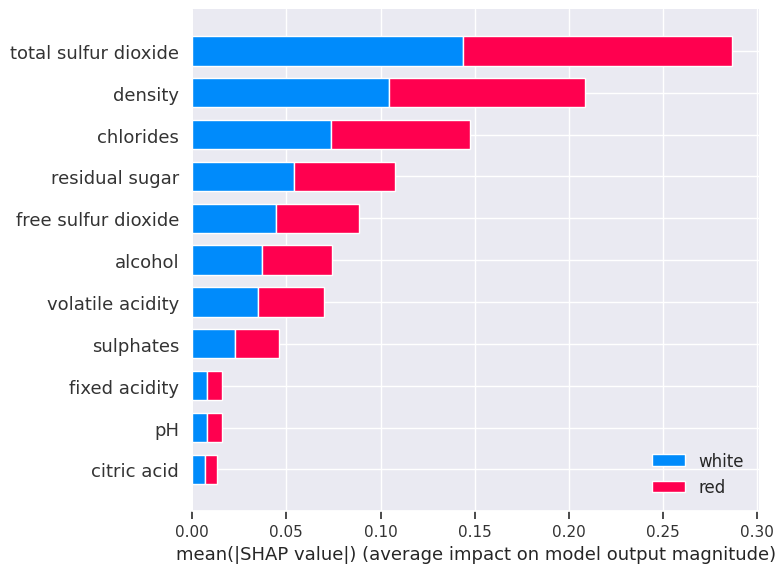

In [128]:
t4pPC.centerTitle("Red vs. whitewines")
shap.summary_plot(shap_values_train,x_train, feature_names = features, class_names=target)

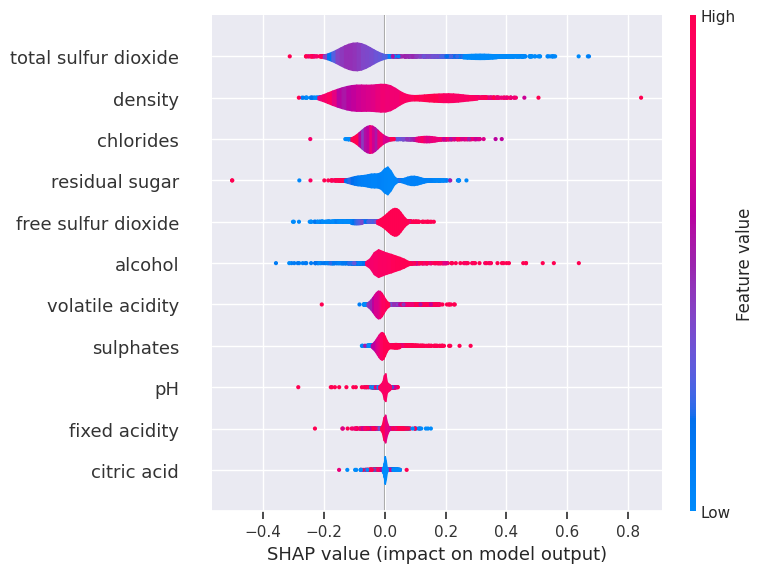

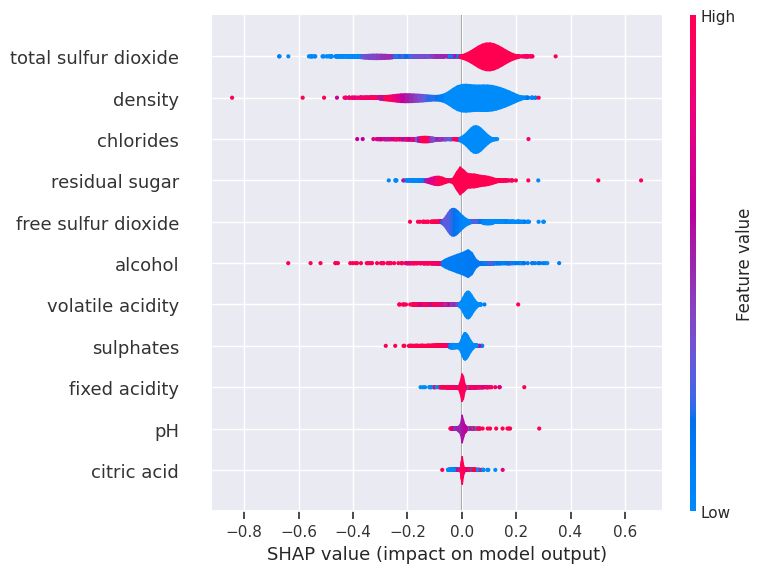

In [129]:
t4pPC.centerTitle(f"Train. Successive summary plots for {target[0]} wines")
shap.summary_plot(shap_values_train[0],x_train, plot_type="violin",feature_names=features,show=True)
t4pPC.centerTitle(f"Train. Successive summary plots for {target[1]} wines")
shap.summary_plot(shap_values_train[1],x_train, plot_type="violin",feature_names=features,show=True)

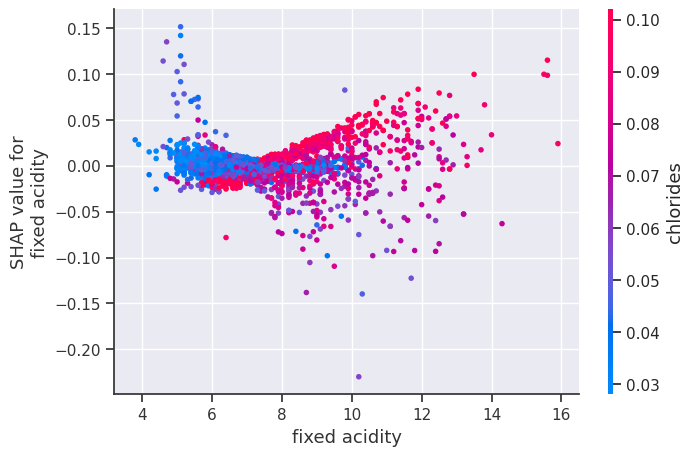

In [130]:
shap.dependence_plot(0, shap_values_train[0], x_train_unscaled, feature_names=features)

In [131]:
vID.end(cwd0)

**End at:** Wednesday 07 February 2024, 17:57:18  
**Duration:** 02:13:21 439ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>